In [1]:
from pyacm import NominalACM
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Read the Data
There is csv file with a sample data set in the github repository. For this example we are using the Brazilian DI futures curve.

In [2]:
yield_curve = pd.read_csv(
    "https://raw.githubusercontent.com/gusamarante/pyacm/refs/heads/main/sample_data/di%20monthly%20maturities.csv",
    index_col=0,
)
yield_curve = yield_curve.iloc[:, :121]  # maturities up to 10y
yield_curve = yield_curve.dropna()
yield_curve.index = pd.to_datetime(yield_curve.index)
yield_curve = yield_curve[yield_curve.index >= "2007-03-01"]

Lets us look at series for some maturities

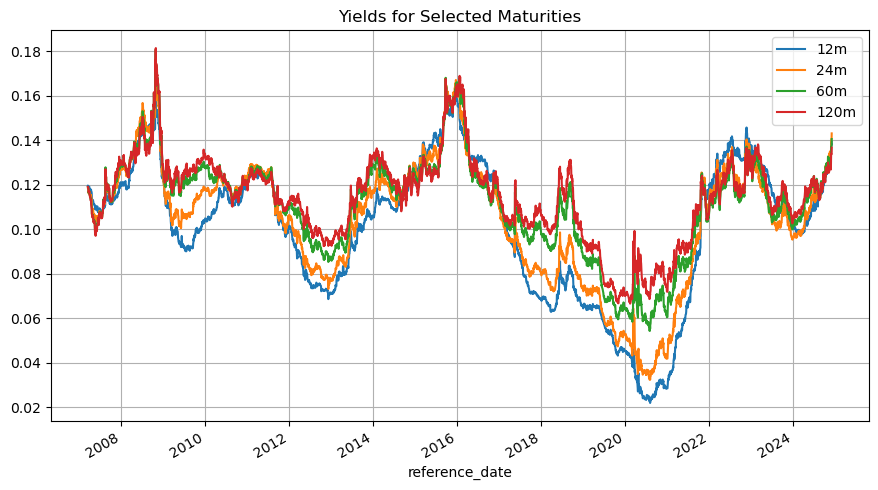

In [3]:
yield_curve[["12m", "24m", "60m", "120m"]].plot(
    legend=True, 
    title="Yields for Selected Maturities", 
    grid=True, 
    figsize=(5 * 16/9, 5),
)
plt.tight_layout()
plt.show()

# Run the Model
The hard part is getting the data in the right format. Once you have that, running the model is simple

In [4]:
acm = NominalACM(
    curve=yield_curve,
    n_factors=5,
)

# Outputs
We can look at the synthetic returns used by the estimation procedure.

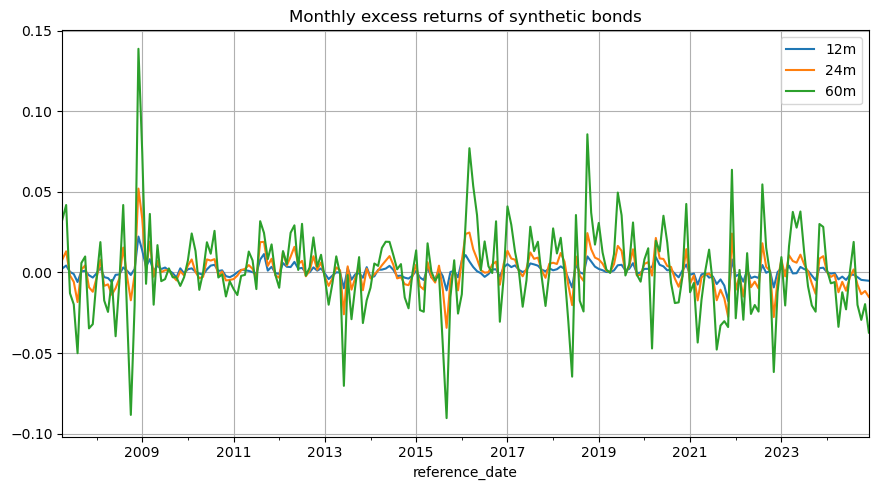

In [5]:
acm.rx_m[["12m", "24m", "60m"]].plot(
    legend=True, 
    title="Monthly excess returns of synthetic bonds", 
    grid=True,
    figsize=(5 * 16/9, 5),
)
plt.tight_layout()
plt.show()

Principal components of the curve

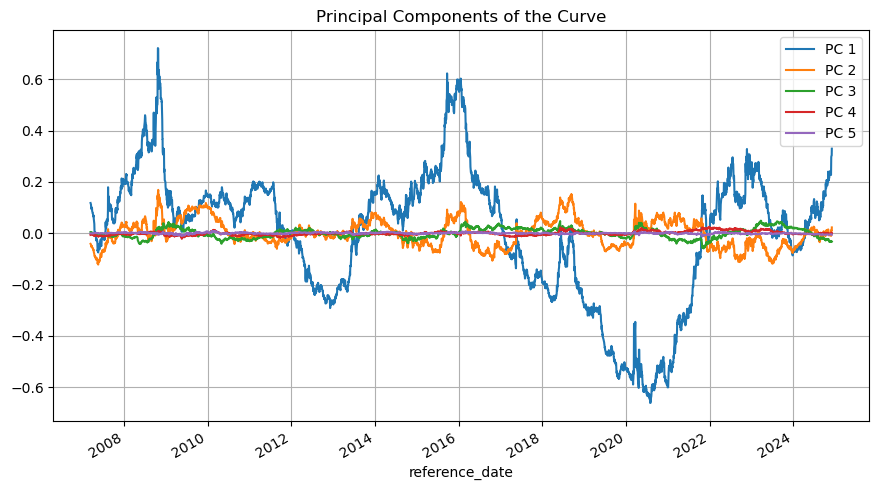

In [6]:
acm.pc_factors_d.plot(
    legend=True, 
    title="Principal Components of the Curve", 
    grid=True,
    figsize=(5 * 16/9, 5),
)
plt.tight_layout()
plt.show()

# Fitted VS Observed Yields
The fit of the model is close to perfect. But it is worth remembering that this does not mean that the model is good. We are using the first 5 principal components to explain moves of the curve. Of course the fit is going to be great. The important part of the model are the risk premium estimates... more on them below.

But looking at the comparison of the fitted and observed yields below, they are practically indistinguishable.

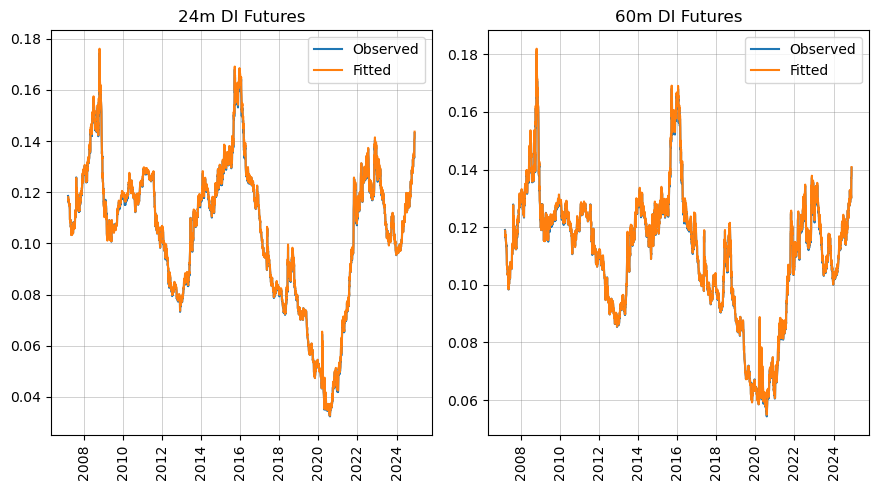

In [7]:
fig = plt.figure(figsize=(5 * (16 / 9), 5))
ax = plt.subplot2grid((1, 2), (0, 0))
mat = "24m"
ax.plot(acm.curve[mat], label='Observed')
ax.plot(acm.miy[mat], label='Fitted')
ax.set_title(f"{mat} DI Futures")
ax.xaxis.grid(color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
ax.yaxis.grid(color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.tick_params(rotation=90, axis="x")
ax.legend(frameon=True, loc="best")

ax = plt.subplot2grid((1, 2), (0, 1))
mat = "60m"
ax.plot(acm.curve[mat], label='Observed')
ax.plot(acm.miy[mat], label='Fitted')
ax.set_title(f"{mat} DI Futures")
ax.xaxis.grid(color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
ax.yaxis.grid(color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.tick_params(rotation=90, axis="x")
ax.legend(frameon=True, loc="best")

plt.tight_layout()
plt.show()

# Risk-Neutral VS Observed
The model generates estimates of risk-neutral rates, which in theory represent only the expectation component of the curve, removing the term premium from the observed rate.

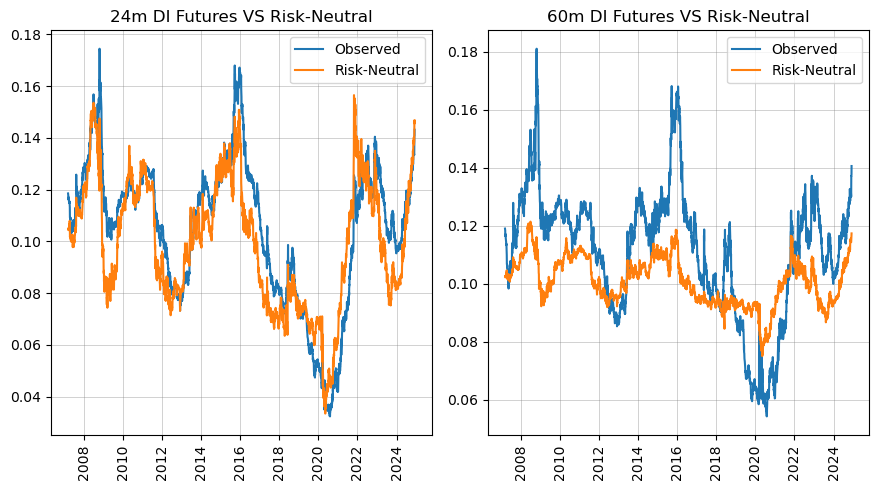

In [8]:
fig = plt.figure(figsize=(5 * (16 / 9), 5))
ax = plt.subplot2grid((1, 2), (0, 0))
mat = "24m"
ax.plot(acm.curve[mat], label='Observed')
ax.plot(acm.rny[mat], label='Risk-Neutral')
ax.set_title(f"{mat} DI Futures VS Risk-Neutral")
ax.xaxis.grid(color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
ax.yaxis.grid(color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.tick_params(rotation=90, axis="x")
ax.legend(frameon=True, loc="best")

ax = plt.subplot2grid((1, 2), (0, 1))
mat = "60m"
ax.plot(acm.curve[mat], label='Observed')
ax.plot(acm.rny[mat], label='Risk-Neutral')
ax.set_title(f"{mat} DI Futures VS Risk-Neutral")
ax.xaxis.grid(color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
ax.yaxis.grid(color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.tick_params(rotation=90, axis="x")
ax.legend(frameon=True, loc="best")

plt.tight_layout()
plt.show()

# Term Premium Estimates
They are the difference between the observed rates and the risk-neutral rate

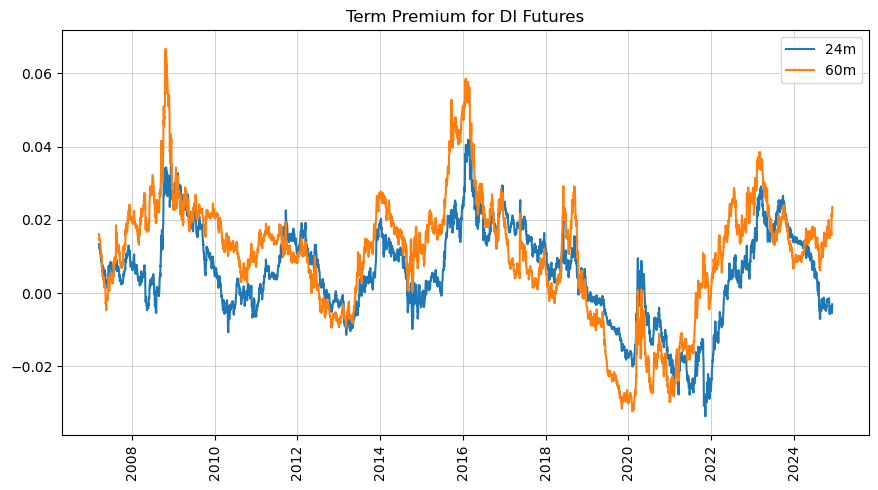

In [9]:
fig = plt.figure(figsize=(5 * (16 / 9), 5))
ax = plt.subplot2grid((1, 1), (0, 0))
ax.plot(acm.tp["24m"], label='24m')
ax.plot(acm.tp["60m"], label='60m')
ax.set_title(f"Term Premium for DI Futures")
ax.xaxis.grid(color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
ax.yaxis.grid(color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.tick_params(rotation=90, axis="x")
ax.legend(frameon=True, loc="best")

plt.tight_layout()
plt.show()

# Term Premium VS Expected Return
This article and model make very explicit the difference between term premium and expected returns. Those are not the same and can even go in different directions sometimes.

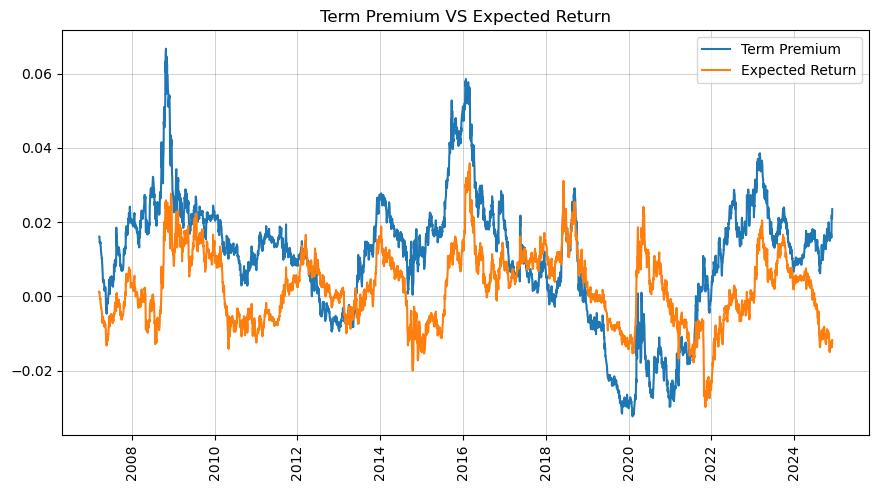

In [10]:
fig = plt.figure(figsize=(5 * (16 / 9), 5))
ax = plt.subplot2grid((1, 1), (0, 0))
ax.plot(acm.tp["60m"], label='Term Premium')
ax.plot(acm.er_hist_d["60m"], label='Expected Return')
ax.set_title(f"Term Premium VS Expected Return")
ax.xaxis.grid(color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
ax.yaxis.grid(color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.tick_params(rotation=90, axis="x")
ax.legend(frameon=True, loc="best")

plt.tight_layout()
plt.show()

# Forward Curve

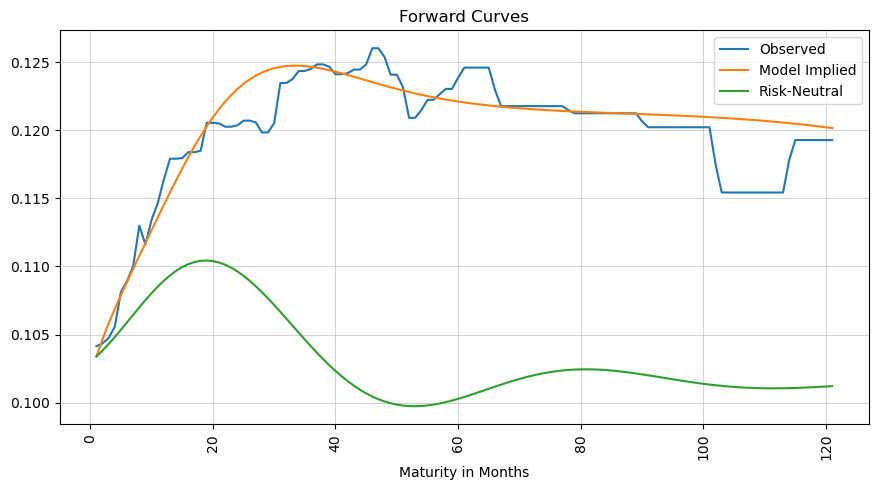

In [11]:
fig = plt.figure(figsize=(5 * (16 / 9), 5))

fwd_curves = acm.fwd_curve("2024-07-05")
fwd_curves = fwd_curves.reset_index(drop=True)
fwd_curves.index = fwd_curves.index + 1

ax = plt.subplot2grid((1, 1), (0, 0))
ax.plot(fwd_curves, label=fwd_curves.columns)
ax.set_title(f"Forward Curves")
ax.set_xlabel("Maturity in Months")
ax.xaxis.grid(color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
ax.yaxis.grid(color="grey", linestyle="-", linewidth=0.5, alpha=0.5)
ax.tick_params(rotation=90, axis="x")
ax.legend(frameon=True, loc="best")

plt.tight_layout()
plt.show()